In [3]:
from SMPyBandits.Arms import Bernoulli
from SMPyBandits.Environment import Evaluator
from SMPyBandits.Policies import (
    EpsilonGreedy, EpsilonDecreasing, EpsilonFirst,
    UCB, UCBalpha,
    klUCB, MOSS,
    BayesUCB, Thompson,
)

# ===============================
# 1) Define Bandit Environments
# ===============================

means_far   = [0.8, 0.6, 0.4]
means_close = [0.8, 0.78, 0.75]

ENVIRONMENTS = [
    {
        "arm_type": "Bernoulli",
        "params": means_far,
        "label": "Bernoulli-Far"
    },
    {
        "arm_type": "Bernoulli",
        "params": means_close,
        "label": "Bernoulli-Close"
    }
]

# ===============================
# 2) Define Algorithms (Policies)
# ===============================

HORIZON     = 10000
REPETITIONS = 100

POLICIES = [
    {"archtype": EpsilonGreedy,     "params": {"epsilon": 0.1}},
    {"archtype": EpsilonDecreasing, "params": {"epsilon": 0.5}},
    {"archtype": EpsilonFirst,      "params": {"horizon": HORIZON, "epsilon": 0.1}},
    {"archtype": UCB,               "params": {}},
    {"archtype": UCBalpha,          "params": {"alpha": 2.0}},
    {"archtype": MOSS,              "params": {}},
    {"archtype": klUCB,             "params": {}},
    {"archtype": BayesUCB,          "params": {}},
    {"archtype": Thompson,          "params": {}},
]

# ==========================================
# 3) SMPyBandits Evaluator Configuration
# ==========================================

CONFIG = {
    "environments": ENVIRONMENTS,
    "policies": POLICIES,
    "horizon": HORIZON,
    "repetitions": REPETITIONS,

    # Most important for Windows: no multiprocessing
    "n_jobs": 1,
    "verbosity": 1,          # show progress
    "random_shuffle": False  # avoid weird ordering issues
}

# ==========================================
# 4) Run Benchmark + Plot Results
# ==========================================

evaluation = Evaluator(CONFIG)
evaluation.runAll()

# ====== Results for Far Arms ======
print("\n===== RESULTS: FAR (0.8, 0.6, 0.4) =====")
evaluation.printFinalRanking(envId=0)
evaluation.plotRegrets(envId=0)
evaluation.plotBestArmPulls(envId=0)

# ====== Results for Close Arms ======
print("\n===== RESULTS: CLOSE (0.8, 0.78, 0.75) =====")
evaluation.printFinalRanking(envId=1)
evaluation.plotRegrets(envId=1)
evaluation.plotBestArmPulls(envId=1)


Number of policies in this comparison: 9
Time horizon: 10000
Number of repetitions: 100
Sampling rate for plotting, delta_t_plot: 1
Number of jobs for parallelization: 1


KeyError: 'environment'

In [7]:
import SMPyBandits.Environment.Evaluator as E
dir(E)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__initEnvironments__',
 '__initPolicies__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_xlabel',
 'compute_cache_rewards',
 'getAllLastWeightedSelections',
 'getAverageRewards',
 'getAverageWeightedSelections',
 'getBestArmPulls',
 'getCumulatedRegret',
 'getCumulatedRegret_LessAccurate',
 'getCumulatedRegret_MoreAccurate',
 'getLastRegrets',
 'getLastRegrets_LessAccurate',
 'getLastRegrets_MoreAccurate',
 'getMaxMinReward',
 'getMaxRewards',
 'getMemoryConsumption',
 'getNumberOfCPDetections',
 'getPulls',
 'getRewards',
 'getRewardsSquared',
 'getRunningTimes',
 'getSTDRegret',
 'plotBestArmPulls',
 'plotHistoryOfMeans',
 'plotLastRegrets',
 'plotMemoryConsum

In [9]:
from SMPyBandits.Environment import *


import SMPyBandits.Environment as ENV
dir(ENV)


['ChangingAtEachRepMAB',
 'CollisionModels',
 'DPI',
 'Evaluator',
 'EvaluatorMultiPlayers',
 'EvaluatorSparseMultiPlayers',
 'IncreasingMAB',
 'MAB',
 'MarkovianMAB',
 'NonStationaryMAB',
 'Parallel',
 'PieceWiseStationaryMAB',
 'Result',
 'ResultMultiPlayers',
 'USE_JOBLIB',
 'USE_TQDM',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'allGetRewardsAndUseCollision',
 'amplitude_fairness',
 'closerUserGetsReward',
 'collision_models',
 'defaultCollisionModel',
 'delayed',
 'display_top_tracemalloc',
 'division',
 'fairnessMeasure',
 'fairnessMeasures',
 'fairness_mapping',
 'full_lost_if_collision',
 'gestalt',
 'getCurrentMemory',
 'kendalltau',
 'makemarkers',
 'manhattan',
 'maximizeWindow',
 'meanDistance',
 'mean_fairness',
 'memory_consumption',
 'mo_walrand_fairness',
 'noCollision',
 'notify',
 'onlyUniqUserGetsReward',
 'onlyUniqUserGetsRewardSparse',
 'palette',
 'p

In [11]:
from SMPyBandits.Environment import Evaluator
import inspect

print(inspect.getsource(Evaluator.__init__))


    def __init__(self, configuration,
                 finalRanksOnAverage=FINAL_RANKS_ON_AVERAGE, averageOn=5e-3,
                 useJoblibForPolicies=USE_JOBLIB_FOR_POLICIES,
                 moreAccurate=MORE_ACCURATE):
        self.cfg = configuration  #: Configuration dictionnary
        # Attributes
        self.nbPolicies = len(self.cfg['policies'])  #: Number of policies
        print("Number of policies in this comparison:", self.nbPolicies)
        self.horizon = self.cfg['horizon']  #: Horizon (number of time steps)
        print("Time horizon:", self.horizon)
        self.repetitions = self.cfg.get('repetitions', REPETITIONS)  #: Number of repetitions
        print("Number of repetitions:", self.repetitions)
        self.delta_t_plot = 1 if self.horizon <= 10000 else self.cfg.get('delta_t_plot', DELTA_T_PLOT)  #: Sampling rate for plotting
        print("Sampling rate for plotting, delta_t_plot:", self.delta_t_plot)
        print("Number of jobs for parallelization:", self


===== Environment: Far (0.8, 0.6, 0.4) | means = [0.8, 0.6, 0.4] =====
Running policy: EpsGreedy (eps=0.1)
Running policy: EpsDecreasing (eps0=0.5)
Running policy: EpsFirst (eps=0.1)
Running policy: UCB1
Running policy: UCB-alpha (alpha=2.0)
Running policy: MOSS
Running policy: KL-UCB
Running policy: Bayes-UCB
Running policy: Thompson


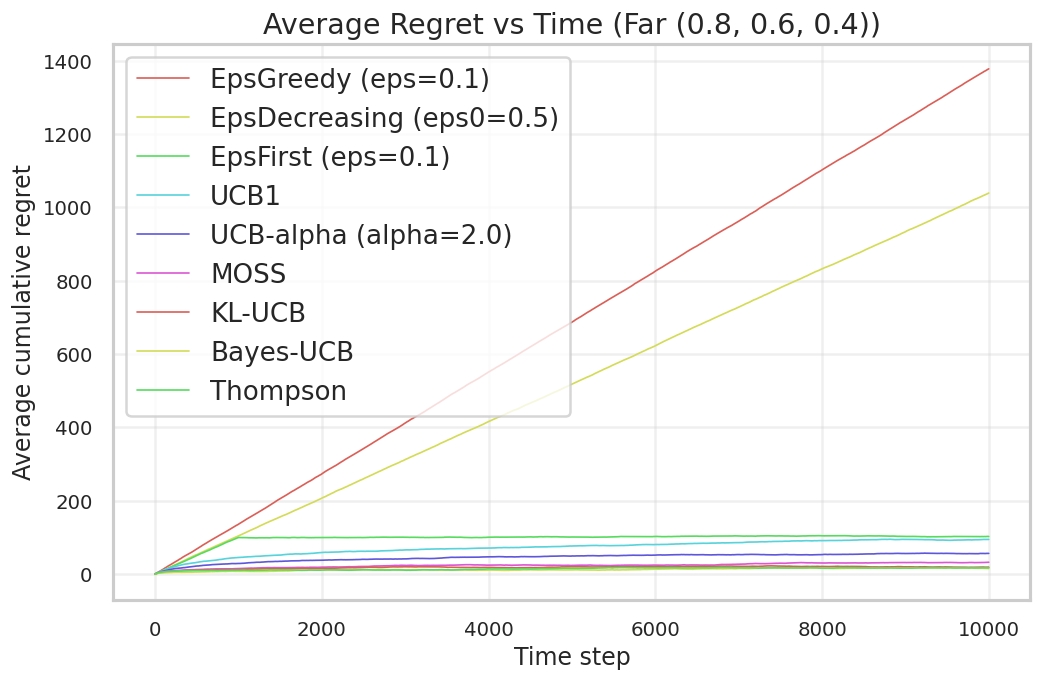


===== Environment: Close (0.8, 0.78, 0.75) | means = [0.8, 0.78, 0.75] =====
Running policy: EpsGreedy (eps=0.1)
Running policy: EpsDecreasing (eps0=0.5)
Running policy: EpsFirst (eps=0.1)
Running policy: UCB1
Running policy: UCB-alpha (alpha=2.0)
Running policy: MOSS
Running policy: KL-UCB
Running policy: Bayes-UCB
Running policy: Thompson


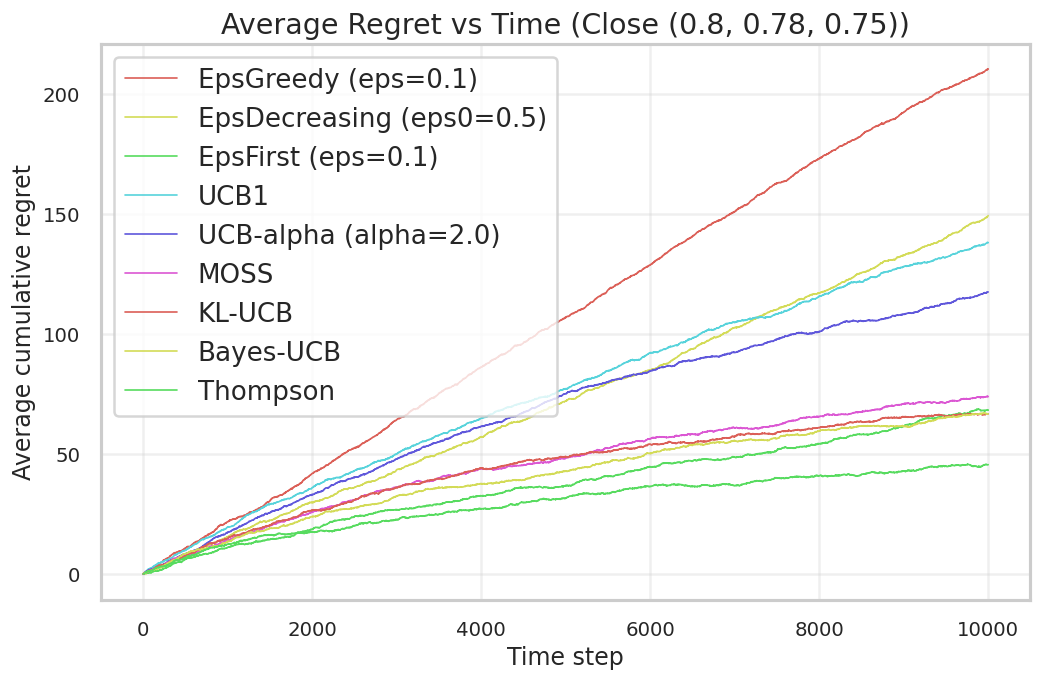

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from SMPyBandits.Policies import (
    EpsilonGreedy, EpsilonDecreasing, EpsilonFirst,
    UCB, UCBalpha,
    klUCB, MOSS,
    BayesUCB, Thompson,
)

# ============================================================
# 1. Define bandit environments (Bernoulli 3-arm problems)
# ============================================================

envs = {
    "Far (0.8, 0.6, 0.4)":  np.array([0.8, 0.6, 0.4]),
    "Close (0.8, 0.78, 0.75)": np.array([0.8, 0.78, 0.75]),
}

HORIZON = 10_000
N_REP   = 100

# ============================================================
# 2. Define policies (algorithms) to compare
#    Each entry: name, class, kwargs
# ============================================================

policy_specs = [
    ("EpsGreedy (eps=0.1)",      EpsilonGreedy,     {"epsilon": 0.1}),
    ("EpsDecreasing (eps0=0.5)", EpsilonDecreasing, {"epsilon": 0.5}),
    ("EpsFirst (eps=0.1)",       EpsilonFirst,      {"horizon": HORIZON, "epsilon": 0.1}),
    ("UCB1",                     UCB,               {}),
    ("UCB-alpha (alpha=2.0)",    UCBalpha,          {"alpha": 2.0}),
    ("MOSS",                     MOSS,              {}),
    ("KL-UCB",                   klUCB,             {}),
    ("Bayes-UCB",                BayesUCB,          {}),
    ("Thompson",                 Thompson,          {}),
]

# ============================================================
# 3. Helper: run one algorithm on one Bernoulli bandit
# ============================================================

def run_one_policy_on_env(means, policy_cls, policy_kwargs,
                          horizon=HORIZON, n_rep=N_REP, rng=None):
    """
    means: np.array of shape (K,), Bernoulli success probs
    returns: avg_regret[t] for t = 1..horizon
    """
    if rng is None:
        rng = np.random.default_rng()

    nb_arms = len(means)
    best_mean = np.max(means)

    regrets = np.zeros((n_rep, horizon), dtype=float)

    for rep in range(n_rep):
        # instantiate policy
        policy = policy_cls(nb_arms, **policy_kwargs)
        policy.startGame()

        cum_reward = 0.0

        for t in range(horizon):
            # choose arm
            arm = policy.choice()
            # generate Bernoulli reward
            reward = 1.0 if rng.random() < means[arm] else 0.0
            # update policy
            policy.getReward(arm, reward)
            # cum reward and regret
            cum_reward += reward
            optimal_cum_reward = best_mean * (t + 1)
            regrets[rep, t] = optimal_cum_reward - cum_reward

    avg_regret = regrets.mean(axis=0)
    return avg_regret

# ============================================================
# 4. Run experiments and plot
# ============================================================

plt.rcParams["figure.figsize"] = (9, 6)

for env_name, means in envs.items():
    print(f"\n===== Environment: {env_name} | means = {means.tolist()} =====")
    all_regrets = []

    for name, cls, kwargs in policy_specs:
        print(f"Running policy: {name}")
        avg_reg = run_one_policy_on_env(means, cls, kwargs)
        all_regrets.append((name, avg_reg))

    # --------- Plot regrets ----------
    plt.figure()
    for name, avg_reg in all_regrets:
        plt.plot(avg_reg, label=name, linewidth=1.0)

    plt.xlabel("Time step")
    plt.ylabel("Average cumulative regret")
    plt.title(f"Average Regret vs Time ({env_name})")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
